In [77]:
import numpy as np
import pandas as pd

df = pd.read_csv("datasets/car.csv")
#df = df.drop(columns=['Year','Model'])

In [79]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [64]:

#df.iloc[0, 1] = np.nan
df = df[['Brand', 'Engine_Size', 'Mileage']]
df = df.head(1000)

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge
target = "Mileage"
categorical = ['Brand']

for col in categorical:
      label_encoder = LabelEncoder()
      df[col] = label_encoder.fit_transform(df[col])


data_real_y = df.loc[:, target].to_numpy()
data_real_X = df.drop(target,axis=1).to_numpy()

X_train_real, X_test_real, y_train_real, y_test_real = model_selection.train_test_split(data_real_X ,data_real_y, test_size=0.2,random_state=42) 

In [74]:
from sklearn.ensemble import RandomForestRegressor


model = LinearRegression()

model.fit(X_train_real, y_train_real)
pred = model.predict(X_train_real)
#mse = metrics.mean_absolute_percentage_error(y_test_real,pred)
#evs = metrics.explained_variance_score(y_test_real, pred)
r2_score = metrics.r2_score(y_train_real,pred)


In [75]:
r2_score

0.0008527236886329836

In [ ]:
mse,evs ,r2_score

(2.8074122813643485, -0.19456306376867882, -0.19468272151332067)

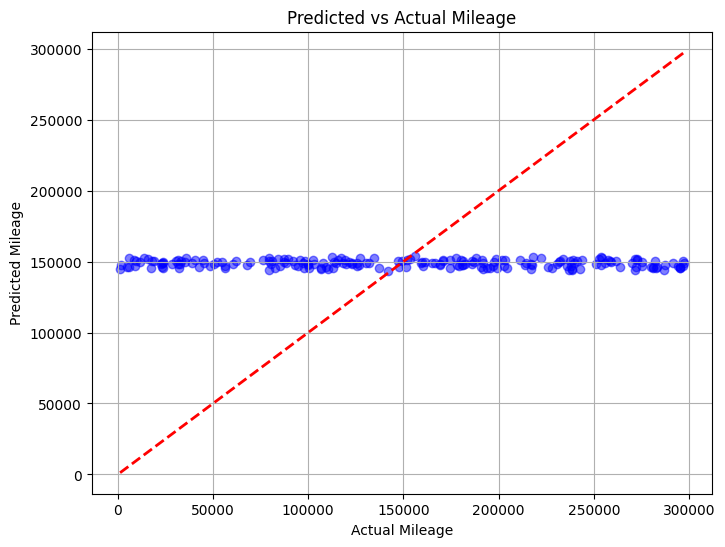

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, pred, alpha=0.5, color='blue')
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual Mileage")
plt.xlabel("Actual Mileage")
plt.ylabel("Predicted Mileage")
plt.grid(True)
plt.show()

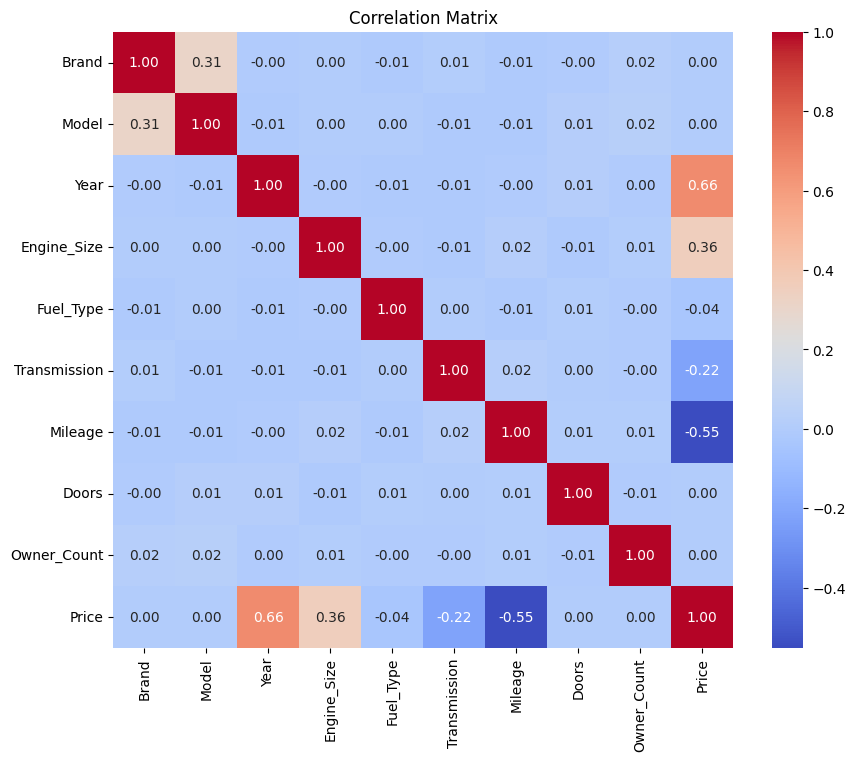

In [82]:
# Encode categorical columns
categorical_columns = ['Brand', 'Fuel_Type', 'Transmission','Model']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()